In [31]:
import pandas as pd
import numpy as np
from dateutil import parser
from datetime import datetime



data=pd.read_csv('Data.csv')
data['formatted_date']=pd.to_datetime(data['formatted_date'],format='%m/%d/%Y')
table= pd.pivot_table(data,index=["formatted_date"],values=["precipProbability"],
                       columns=["formatted_address"],aggfunc=[np.sum],fill_value=0).applymap(lambda x: "{0:.0f}%".format(100*x))


def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    
    color = 'red'
    alpha=float(val[:-1])/100.0+0.25
    return 'font-color:"black";background-color: %s; opacity: %f; ' %(color,alpha)


s = table.style.applymap(color_negative_red)

s

In [35]:
import pandas as pd
import numpy as np
from dateutil import parser
from datetime import datetime
data=pd.read_csv('Data.csv')
data.describe()

,time,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipIntensityMaxTime,precipProbability,precipAccumulation,temperatureMin,...,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,dewPoint,humidity,windSpeed,windBearing,visibility,cloudCover,pressure
count,3.670000e+02,3.670000e+02,3.670000e+02,367.000000,66.000000,63.000000,3.300000e+01,66.000000,1.000,367.000000,...,3.670000e+02,367.000000,3.670000e+02,367.000000,367.000000,367.000000,367.000000,367.000000,351.000000,367.000000
mean,1.487369e+09,1.487395e+09,1.487432e+09,0.625232,0.106847,2.151203,1.487703e+09,0.433788,60.572,40.349809,...,1.487409e+09,45.454251,1.487417e+09,40.428311,0.864659,10.609918,193.326975,6.195613,0.603789,1013.701798
std,6.164028e+05,6.155520e+05,6.172070e+05,0.287960,0.202186,3.447990,5.977412e+05,0.455516,NaN,5.545033,...,6.201787e+05,8.400433,6.136902e+05,5.439124,0.060121,4.545854,79.148728,1.710711,0.262653,12.758367
min,1.485821e+09,1.485848e+09,1.485881e+09,0.030000,0.000000,0.000000,1.486382e+09,0.000000,60.572,28.870000,...,1.485846e+09,27.460000,1.485904e+09,29.560000,0.650000,0.580000,9.000000,2.200000,0.000000,984.500000
25%,1.486944e+09,1.486970e+09,1.487006e+09,0.450000,0.000000,0.000000,1.487268e+09,0.000000,60.572,36.035000,...,1.486949e+09,39.985000,1.486991e+09,35.650000,0.840000,7.365000,160.000000,5.095000,0.435000,1005.760000
50%,1.487462e+09,1.487488e+09,1.487525e+09,0.680000,0.000100,0.011100,1.487840e+09,0.125000,60.572,40.360000,...,1.487473e+09,45.290000,1.487516e+09,41.060000,0.870000,10.400000,221.000000,6.750000,0.620000,1016.060000
75%,1.487894e+09,1.487920e+09,1.487958e+09,0.860000,0.128300,3.730000,1.488146e+09,0.970000,60.572,43.910000,...,1.487918e+09,52.120000,1.487945e+09,43.975000,0.900000,13.890000,249.000000,7.450000,0.820000,1024.260000
max,1.488240e+09,1.488265e+09,1.488304e+09,0.990000,0.796300,10.220000,1.488316e+09,0.980000,60.572,51.780000,...,1.488265e+09,63.500000,1.488323e+09,50.270000,0.980000,21.720000,353.000000,9.560000,1.000000,1030.230000


In [34]:
import pandas as pd
import numpy as np
from dateutil import parser
from datetime import datetime
data=pd.read_csv('Data.csv')
data.describe()
count_data=data.loc[:,['formatted_address','precipType','formatted_date']]

df=count_data.groupby(['formatted_address','precipType']).count() 
df



formatted_date
formatted_address                                  precipType                
Bedford St, Exeter EX1 1GJ, UK                     rain                    23
Central Ave, West Bridgford, Nottingham NG2 5GR... rain                    19
                                                   snow                     3
Chiswick High Rd, Chiswick, London W4 5TA, UK      rain                    11
Christopher Pl, St Albans AL3 5DQ, UK              rain                    27
                                                   snow                     2
Corn Exchange St, Cambridge CB2 3QF, UK            rain                     9
Garrick St, London WC2E 9BH, UK                    rain                     9
High St, Bromley BR1 1DN, UK                       rain                    28
                                                   snow                     1
Holland St, London SE1 9FU, UK                     rain                    22
Jubilee St, Brighton BN1 1GE, UK                   rain                     9
King's Rd, Reading RG1 3EY, UK                     rain                    11
                                                   snow                     1
Lambeth, London SE1 7LY, UK                        rain                    17
Leeds LS1 5AY, UK                                  rain                    25
                                                   snow                     2
Longford, Hounslow TW6 3XA, UK                     rain                     7
Muswell Hill Broadway, London N10 1BY, UK          rain                    17
Patchway, Bristol BS34 5DG, UK                     rain                     6
Southampton SO15 1QF, UK                           rain                     7
The Grove, Ilkley LS29 9PA, UK                     rain                    21
                                                   snow                     2
Waterside, Stratford-upon-Avon CV37 6BA, UK        rain                     6
Watford WD17, UK                                   rain                    21
                                                   snow                     1
Wolsey Walk, Woking GU21 6XX, UK                   rain                    26
                                                   snow                     1

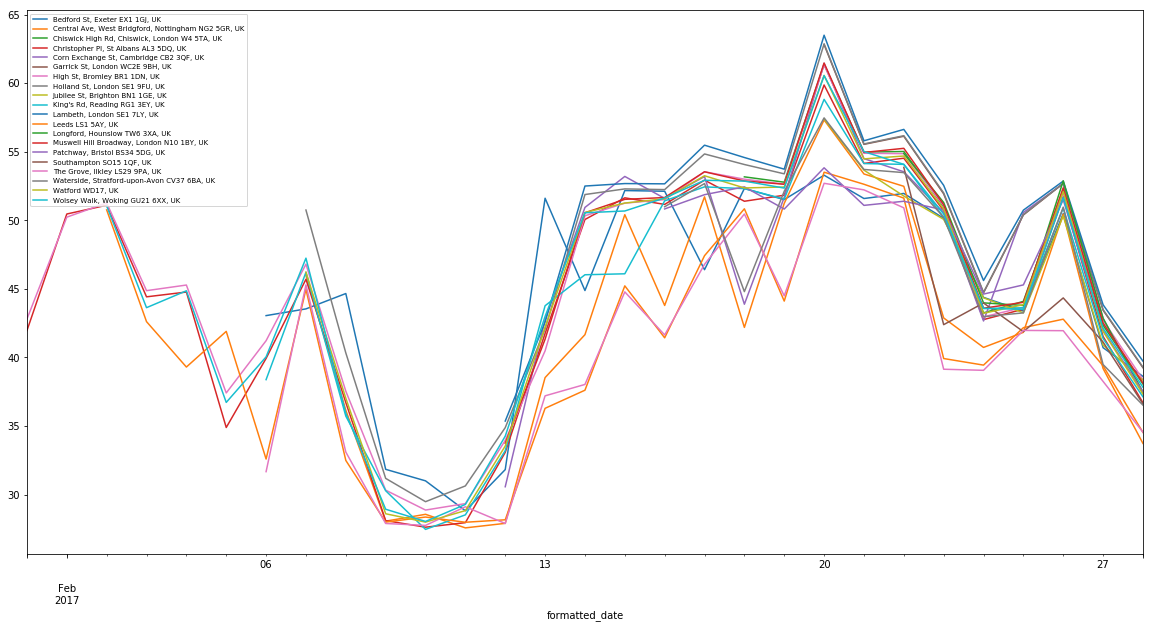

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Data.csv')
fig, ax = plt.subplots(figsize=(20, 10))

labels=[]
series_data=data.loc[:,['formatted_address','formatted_date','apparentTemperatureMax']]
series_data['formatted_date']=pd.to_datetime(series_data['formatted_date'],format='%m/%d/%Y')

for key, grp in series_data.groupby(['formatted_address']):
    ax = grp.plot(ax=ax, kind='line', x='formatted_date', y='apparentTemperatureMax')
    labels.append(key)
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels,loc='best',fontsize=7)
plt.show()

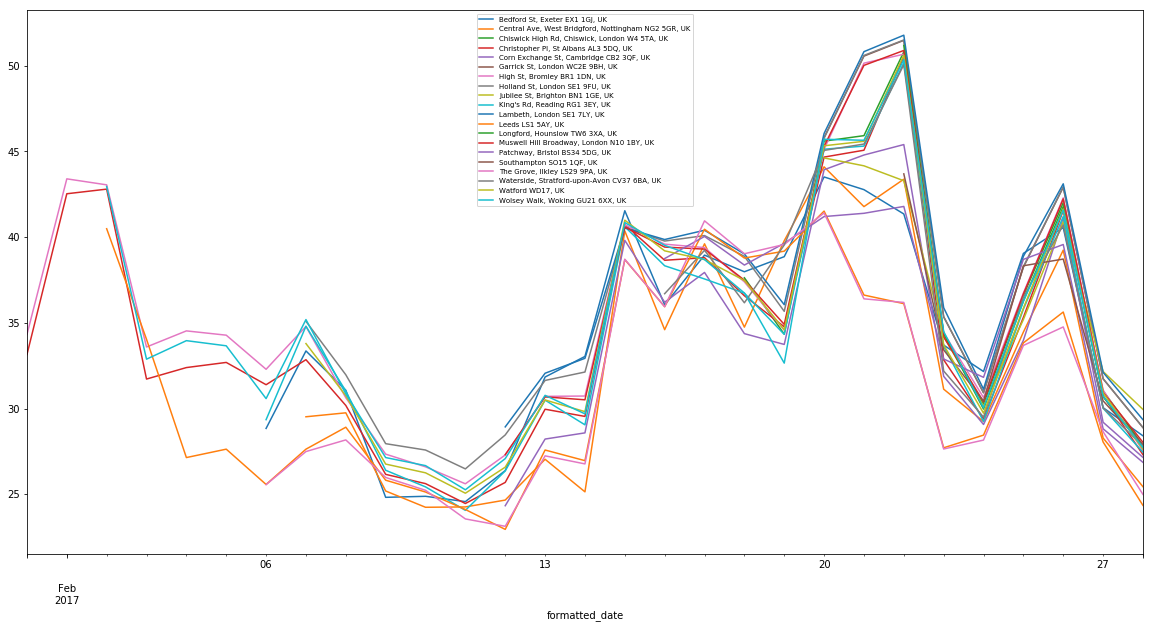

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Data.csv')
fig, ax = plt.subplots(figsize=(20, 10))

labels=[]
series_data=data.loc[:,['formatted_address','formatted_date','apparentTemperatureMin']]
series_data['formatted_date']=pd.to_datetime(series_data['formatted_date'],format='%m/%d/%Y')

for key, grp in series_data.groupby(['formatted_address']):
    ax = grp.plot(ax=ax, kind='line', x='formatted_date', y='apparentTemperatureMin')
    labels.append(key)
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels,loc='best',fontsize=7)
plt.show()

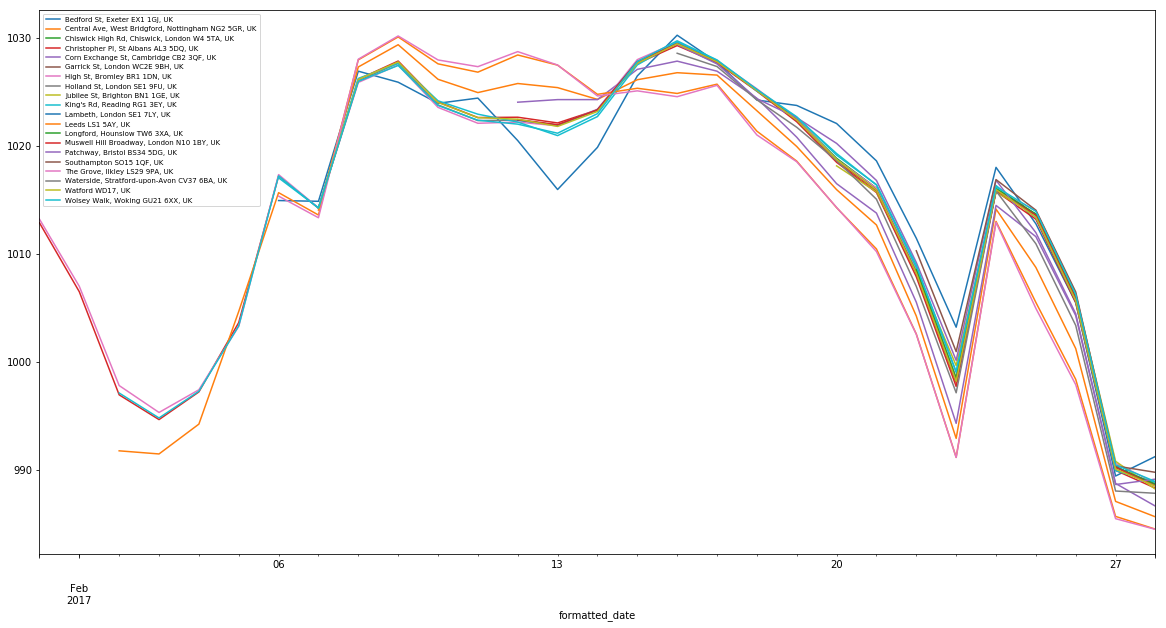

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Data.csv')
fig, ax = plt.subplots(figsize=(20, 10))

labels=[]
series_data=data.loc[:,['formatted_address','formatted_date','pressure']]
series_data['formatted_date']=pd.to_datetime(series_data['formatted_date'],format='%m/%d/%Y')

for key, grp in series_data.groupby(['formatted_address']):
    ax = grp.plot(ax=ax, kind='line', x='formatted_date', y='pressure')
    labels.append(key)
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels,loc='best',fontsize=7)
plt.show()

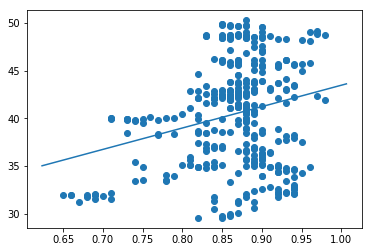

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Data.csv')

def scatter_plot_with_correlation_line(x, y):
    '''
    http://stackoverflow.com/a/34571821/395857
    x does not have to be ordered.
    '''
    # Scatter plot
    plt.scatter(x, y)

    # Add correlation line
    axes = plt.gca()
    m, b = np.polyfit(x, y, 1)
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-')

    
    plt.show()
# Circle through all the keys to get the values for the maximum temperature and the
# corresponding Lat and Longs

X = []; Y = []; 
X=data['humidity'].values
Y=data['dewPoint'].values
# Now that those are collected, let's see what the Temperature as a function of Latitude is:

scatter_plot_with_correlation_line(X,Y)




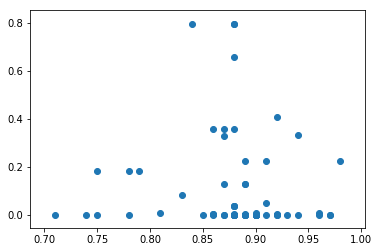

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Data.csv')

def scatter_plot_with_correlation_line(x, y):
    '''
    http://stackoverflow.com/a/34571821/395857
    x does not have to be ordered.
    '''
    # Scatter plot
    plt.scatter(x, y)

    # Add correlation line
    axes = plt.gca()
    m, b = np.polyfit(x, y, 1)
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-')

    
    plt.show()
# Circle through all the keys to get the values for the maximum temperature and the
# corresponding Lat and Longs

X = []; Y = []; 
X=data['humidity'].values
Y=data['precipIntensity'].values
# Now that those are collected, let's see what the Temperature as a function of Latitude is:

scatter_plot_with_correlation_line(X,Y)

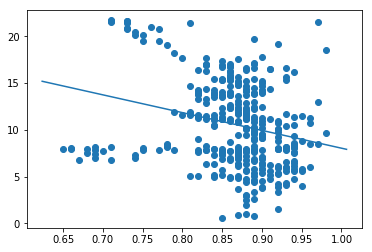

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Data.csv')

def scatter_plot_with_correlation_line(x, y):
    '''
    http://stackoverflow.com/a/34571821/395857
    x does not have to be ordered.
    '''
    # Scatter plot
    plt.scatter(x, y)

    # Add correlation line
    axes = plt.gca()
    m, b = np.polyfit(x, y, 1)
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-')

    
    plt.show()
# Circle through all the keys to get the values for the maximum temperature and the
# corresponding Lat and Longs

X = []; Y = []; 
X=data['humidity'].values
Y=data['windSpeed'].values
# Now that those are collected, let's see what the Temperature as a function of Latitude is:

scatter_plot_with_correlation_line(X,Y)

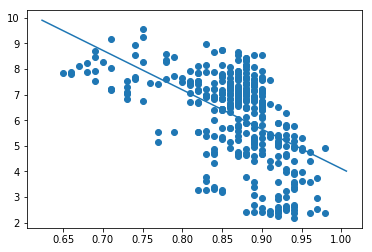

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Data.csv')

def scatter_plot_with_correlation_line(x, y):
    '''
    http://stackoverflow.com/a/34571821/395857
    x does not have to be ordered.
    '''
    # Scatter plot
    plt.scatter(x, y)

    # Add correlation line
    axes = plt.gca()
    m, b = np.polyfit(x, y, 1)
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-')

    
    plt.show()
# Circle through all the keys to get the values for the maximum temperature and the
# corresponding Lat and Longs

X = []; Y = []; 
X=data['humidity'].values
Y=data['visibility'].values
# Now that those are collected, let's see what the Temperature as a function of Latitude is:

scatter_plot_with_correlation_line(X,Y)